In [27]:
import numpy as np
import fenics
from interpolate_matrices import *
from random_fenics_function_makers import random_smooth_partition_of_unity
import matplotlib.pyplot as plt
from plot_ellipse import plot_ellipse

In [17]:
interpolation_temperature=3

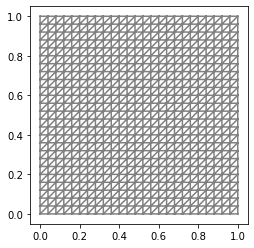

In [18]:
mesh = fenics.UnitSquareMesh(25,25)
V = fenics.FunctionSpace(mesh, 'CG', finite_element_order)
fenics.plot(mesh)

In [21]:
ww = random_smooth_partition_of_unity(4, V, temperature=interpolation_temperature, normalize=True)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [23]:
C0 = np.array([[0.54, 0.33],
               [0.33,  0.25]])
C1 = np.array([[ 0.50, -0.40],
               [-0.40,  0.48]])
C2 = np.array([[ 0.69, -0.11],
               [-0.11,  3.17]])
C3 = np.array([[ 2.40, -0.33],
               [-0.33,  0.78]])
CC = [C0, C1, C2, C3]

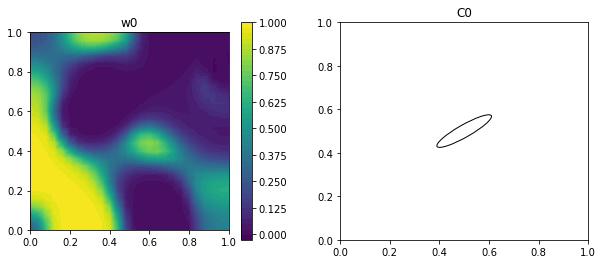

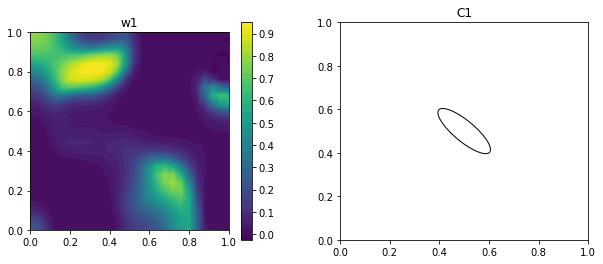

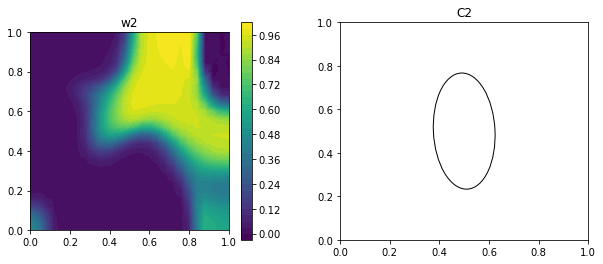

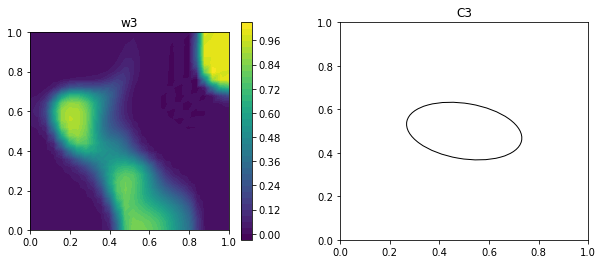

In [29]:
nw = len(ww)
for k in range(nw):
    f = plt.figure()
    f.set_figwidth(10)
    
    plt.subplot(1,2,1)
    c = fenics.plot(ww[k])
    plt.colorbar(c)
    plt.title('w'+str(k))
    
    ax = plt.subplot(1,2,2)
    plot_ellipse(ax, np.array([0.5,0.5]), CC[k], 0.15)
    plt.title('C'+str(k))
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    plt.subplots_adjust(wspace=0.25)

In [31]:
matrix_field = interpolate_matrices(ww, CC)

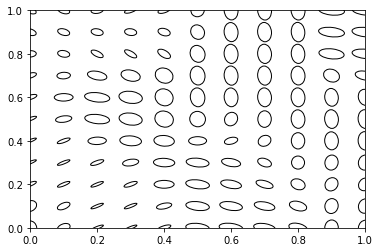

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

xx = np.linspace(0., 1., 11)
yy = np.linspace(0., 1., 11)

for ii in range(len(xx)):
    for jj in range(len(yy)):
        mu = np.array([xx[ii], yy[jj]])
        Sigma = matrix_field(np.array(mu)).reshape((2,2))
        plot_ellipse(ax, mu, Sigma, 0.025)